<a href="https://colab.research.google.com/github/h-neal/ukpropertyprices/blob/main/Price_Paid_Dataset_(Hampshire_5_year)_Exploratory_Analysis_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Dataset**

In [ ]:
#Importing the model dataset

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Use pd.read_pickle() to read the pickle file
df_cleaned_housing_data = pd.read_pickle('/content/drive/MyDrive/Housing Prices Project/Hampshire 5 Year/cleaned_housing_data_Hampshire_5_year.pkl')

Mounted at /content/drive


**2. Overview of the Dataset**

2.1. Checking for Missing Values

In [ ]:
# Checking for Missing Values

missing_values = df_cleaned_housing_data.isnull().sum()
print(missing_values)

Transaction Unique ID                           0
Price                                           0
Date of Transfer                                0
Post Code                                       0
Property Type                                   0
New Build? (Y/N)                                0
Duration                                        0
Primary Addressable Object Name (PAON)          0
Secondary Addressable Object Name (SAON)    82558
Town/City                                       0
District                                        0
Price_Segment                                   0
latitude                                        0
longitude                                       0
Post Code Area                                  0
dtype: int64


2.2. Summary Statistics

In [ ]:
# Getting summary statistics for numerical column labelled "Price"

print(df_cleaned_housing_data['Price'].describe())


count    9.291700e+04
mean     4.131820e+05
std      2.769361e+05
min      2.160000e+03
25%      2.600000e+05
50%      3.500000e+05
75%      4.850000e+05
max      8.500000e+06
Name: Price, dtype: float64


2.3. Data Types

In [ ]:
# Checking for data types and overall structure

df_cleaned_housing_data.dtypes


Transaction Unique ID                               object
Price                                                int64
Date of Transfer                            datetime64[ns]
Post Code                                           object
Property Type                                     category
New Build? (Y/N)                                  category
Duration                                          category
Primary Addressable Object Name (PAON)              object
Secondary Addressable Object Name (SAON)            object
Town/City                                           object
District                                            object
Price_Segment                                       object
latitude                                            object
longitude                                           object
Post Code Area                                      object
dtype: object

2.4. Value counts for categorical columns

In [ ]:
# Producing a table for the counts of the values of the columns labelled "Property Type", "New Build? (Y/N)", "Duration" and "Price_Segment".

print(df_cleaned_housing_data['Property Type'].value_counts())

print(df_cleaned_housing_data['New Build? (Y/N)'].value_counts())

print(df_cleaned_housing_data['Duration'].value_counts())

print(df_cleaned_housing_data['Price_Segment'].value_counts())


Property Type
D    32362
S    23111
T    22036
F    15408
O        0
Name: count, dtype: int64
New Build? (Y/N)
N    81376
Y    11541
Name: count, dtype: int64
Duration
F    76705
L    16212
Name: count, dtype: int64
Price_Segment
Regular     87653
High-End     3865
Luxury       1399
Name: count, dtype: int64


In [ ]:
# Removing the Category "O" from the column labelled Property Type

df_cleaned_housing_data['Property Type'] = df_cleaned_housing_data['Property Type'].cat.remove_unused_categories()

In [ ]:
# Value counts for adjusted categorical columns

print(df_cleaned_housing_data['Property Type'].value_counts())

Property Type
D    32362
S    23111
T    22036
F    15408
Name: count, dtype: int64


**3. Univariate Analysis**

3.1. Price

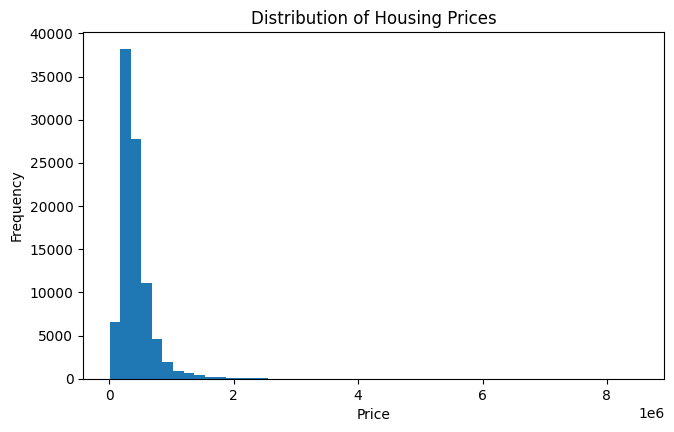

In [ ]:
import matplotlib.pyplot as plt

# Plotting Histogram for the column labelled "Price"

plt.figure(figsize=(7.5, 4.5))
plt.hist(df_cleaned_housing_data['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Housing Prices')
plt.show()


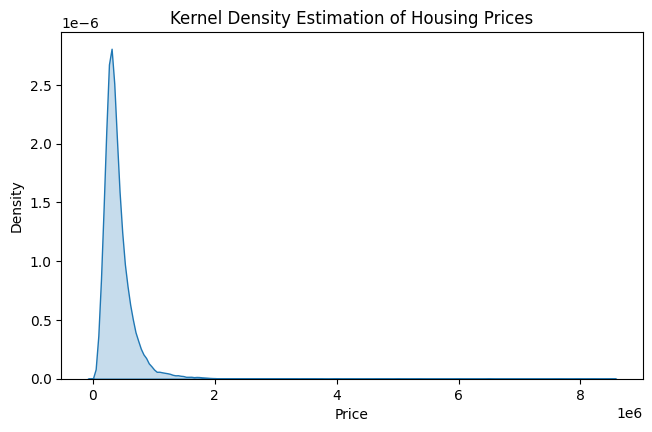

In [ ]:
import seaborn as sns

# Plotting KDE plot for the column labelled "Price"

plt.figure(figsize=(7.5, 4.5))
sns.kdeplot(df_cleaned_housing_data['Price'], fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Housing Prices')
plt.show()


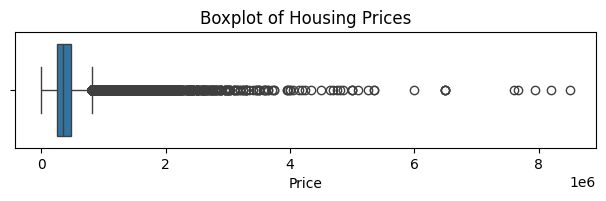

In [ ]:
# Plotting a Boxplot for the column labelled "Price"

plt.figure(figsize=(7.5, 1.5))
sns.boxplot(x=df_cleaned_housing_data['Price'])
plt.xlabel('Price')
plt.title('Boxplot of Housing Prices')
plt.show()


In [ ]:
# Calculating Skewness and Kurtosis

from scipy.stats import skew, kurtosis

print("Skewness of Price:", skew(df_cleaned_housing_data['Price']))
print("Kurtosis of Price:", kurtosis(df_cleaned_housing_data['Price']))


Skewness of Price: 5.181284400507217
Kurtosis of Price: 70.11057114741607


Findings:

1. The Skewness of Price is 4.98, indicating that the distribution of prices is skewed to the right. Hence, there are many lower-priced observations, but a few extreme, high-priced observations pulling the distribution to the right. This right skew suggests that there are some very high outliers in the dataset.

2. The Kurtosis of Price is 63.75, indicating that the distribution of prices has heavy tails, meaning there are many outliers (particularly extreme values far from the mean). Hence, the price distribution has more extreme deviations than a normal distribution.

Overall Conclusion:

The data shows that prices are skewed to the right, with a lot of outliers or extreme values. This might suggest that a small number of high-priced items are significantly affecting the distribution, making it non-normal.

3.2. Categorical Columns

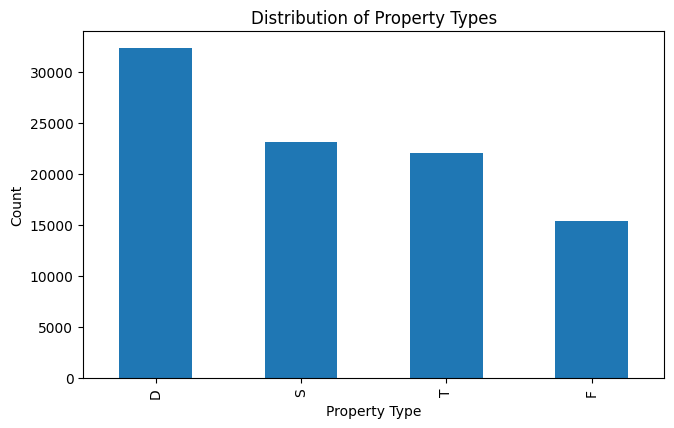

In [ ]:
# Plotting Bar chart for the column labelled "Property Type"

plt.figure(figsize=(7.5, 4.5))
df_cleaned_housing_data['Property Type'].value_counts().plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.show()


Findings:

- "Detatched" and "Semi-Detatched" make up the majority of the transactions, whilst "Flats" are the property type which have the least transactions.

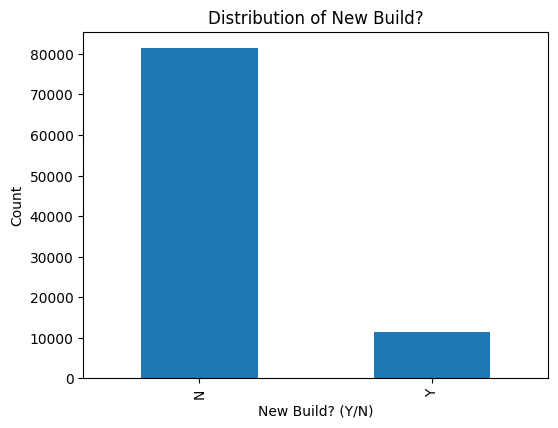

In [ ]:
# Plotting Bar chart for the column labelled "New Build? (Y/N)"

plt.figure(figsize=(6, 4.5))
df_cleaned_housing_data['New Build? (Y/N)'].value_counts().plot(kind='bar')
plt.xlabel('New Build? (Y/N)')
plt.ylabel('Count')
plt.title('Distribution of New Build?')
plt.show()


Findings: The majority of the transactions are not New Build properties.

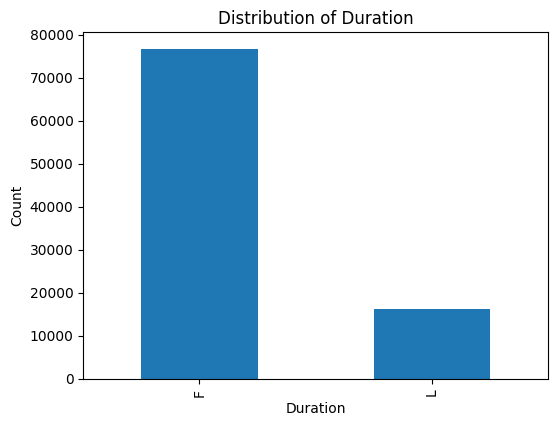

In [ ]:
# Plotting Bar chart for the column labelled "Duration"

plt.figure(figsize=(6, 4.5))
df_cleaned_housing_data['Duration'].value_counts().plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of Duration')
plt.show()


Findings: The majority of the transactions are "Freehold" properties.

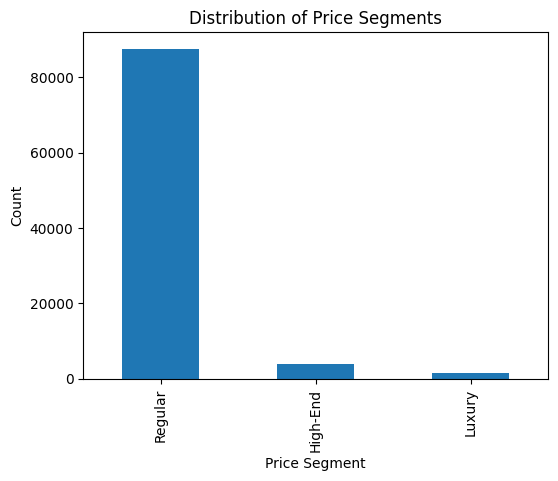

In [ ]:
# Plotting Bar chart for the column labelled "Price_Segment"

plt.figure(figsize=(6, 4.5))
df_cleaned_housing_data['Price_Segment'].value_counts().plot(kind='bar')
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('Distribution of Price Segments')
plt.show()


Findings: The majority of the transactions are from the "Regular" Price Segment.

**4. Bivariate Analysis**

4.1. Price vs. Categorical Variables

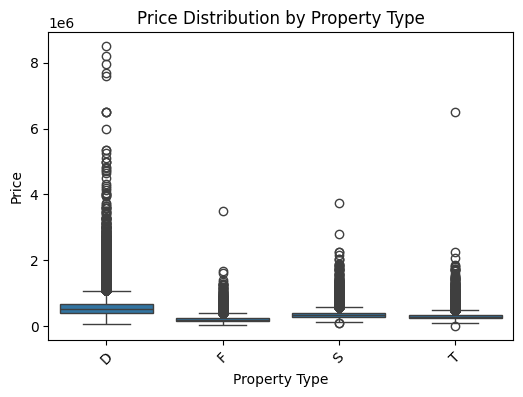

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "Property Type"

plt.figure(figsize=(6, 4))
sns.boxplot(x='Property Type', y='Price', data=df_cleaned_housing_data)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)
plt.show()


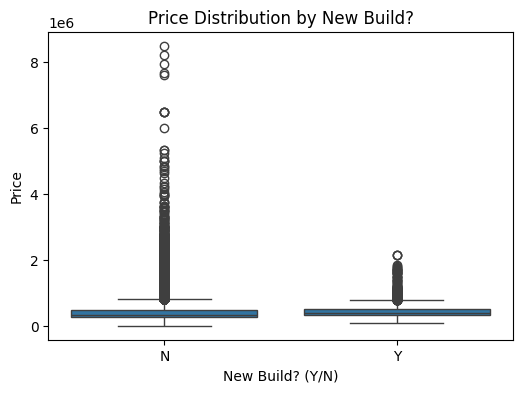

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "New Build? (Y/N)"

plt.figure(figsize=(6, 4))
sns.boxplot(x='New Build? (Y/N)', y='Price', data=df_cleaned_housing_data)
plt.xlabel('New Build? (Y/N)')
plt.ylabel('Price')
plt.title('Price Distribution by New Build?')
plt.show()


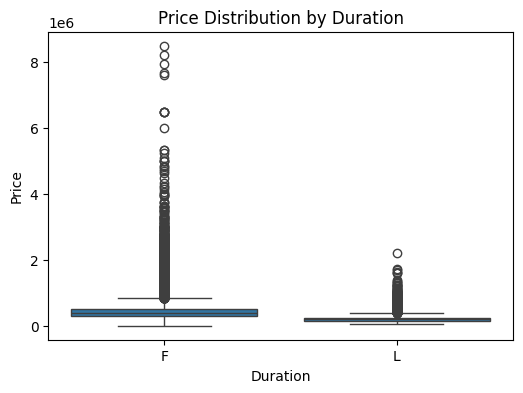

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "Duration"

plt.figure(figsize=(6, 4))
sns.boxplot(x='Duration', y='Price', data=df_cleaned_housing_data)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Price Distribution by Duration')
plt.show()


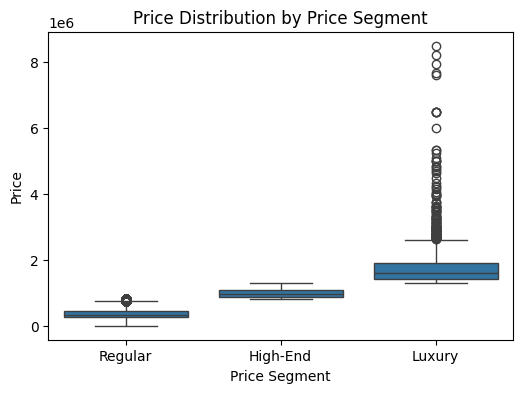

In [ ]:
# Plotting a Boxplot for the column labelled "Price" by the column labelled "Price_Segment".

order = ['Regular', 'High-End', 'Luxury']  # Define the order for the x-axis

plt.figure(figsize=(6, 4))
sns.boxplot(x='Price_Segment', y='Price', data=df_cleaned_housing_data, order=order)
plt.xlabel('Price Segment')
plt.ylabel('Price')
plt.title('Price Distribution by Price Segment')
plt.show()


4.2. Price vs. Location

In [ ]:
# Counting the unique values in the column labelled "Town/City"

print(df_cleaned_housing_data['Town/City'].nunique())


45


In [ ]:
# Counting the unique values in the column labelled "District"

print(df_cleaned_housing_data['District'].nunique())


11


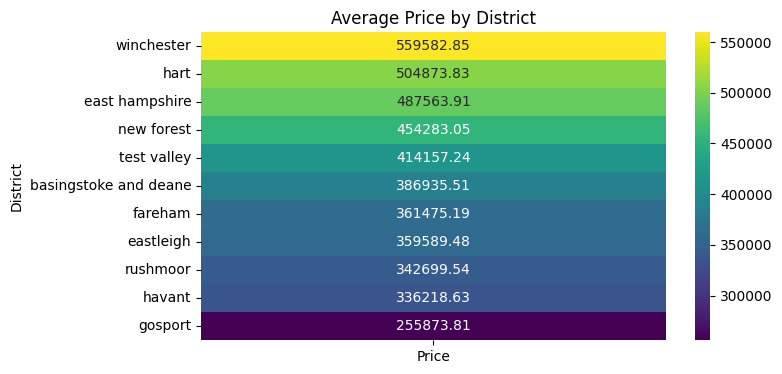

In [ ]:
# Plotting a Heatmap of the column labelled "Price" by the column labelled "District".

# Calculating the average price for each region
region_avg_price = df_cleaned_housing_data.groupby('District')['Price'].mean().sort_values(ascending=False)

# Creating a new DataFrame with the average prices
region_avg_price_df = pd.DataFrame(region_avg_price)

# Creating a heatmap
plt.figure(figsize=(7.5, 4))
sns.heatmap(region_avg_price_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Price by District')
plt.show()


Findings: The mean average price is generally greater in Greater London and in the South of England. The mean average price is generally lesser in the North of England and in Wales.

In [ ]:
# Plotting a geospatial heatmap of the UK using the columns labelled "Price", "longitude" and "latitude".

import folium
from folium.plugins import HeatMap

# Creating a base map centered on the UK
map_uk = folium.Map(location=[54.0, -2.0], zoom_start=5)

# Preparing the data for the heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_cleaned_housing_data.iterrows()]

# Adding the heatmap to the map
HeatMap(heat_data, radius=15, blur=15).add_to(map_uk)

# Displaying the map
display(map_uk)


4.3. Price Over Time

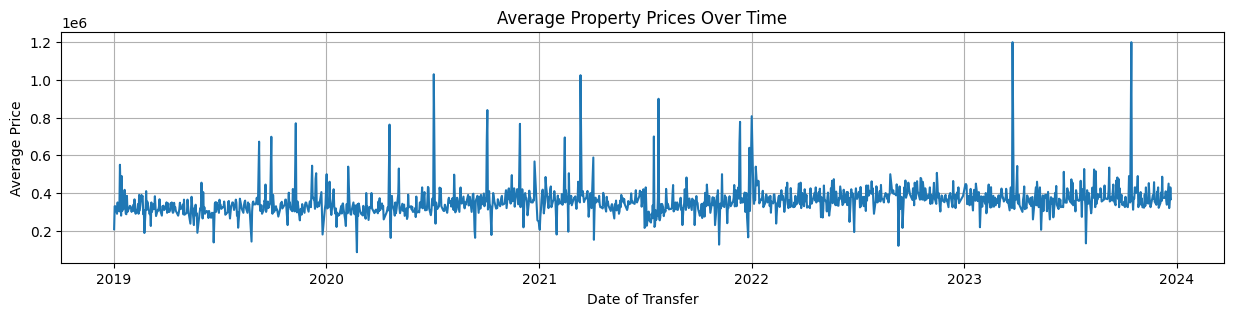

In [ ]:
# Time Series Analysis: Plotting a graph that shows the column labelled "Prices" has changed with column labelled "Date of Transfer"

# Converting the "Date of Transfer" column to datetime objects
df_cleaned_housing_data['Date of Transfer'] = pd.to_datetime(df_cleaned_housing_data['Date of Transfer'])

# Grouping the data by date and calculate the average price
price_over_time = df_cleaned_housing_data.groupby('Date of Transfer')['Price'].median()

# Plotting the time series
plt.figure(figsize=(15, 3))
plt.plot(price_over_time.index, price_over_time.values)
plt.xlabel('Date of Transfer')
plt.ylabel('Average Price')
plt.title('Average Property Prices Over Time')
plt.grid(True)
plt.show()


<ipython-input-25-7b3ec042138b>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_price = df_cleaned_housing_data.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()


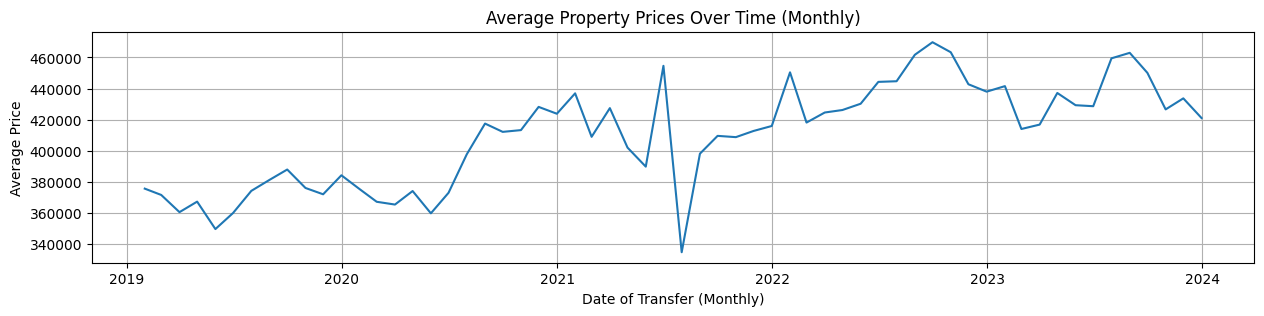

In [ ]:
# Time Series Analysis: Plotting a graph that shows the column labelled "Prices" has changed with column labelled "Date of Transfer" over monthly intervals

# Resampling the data to monthly intervals and calculate the mean price for each month
monthly_avg_price = df_cleaned_housing_data.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()

# Plotting the time series
plt.figure(figsize=(15, 3))
plt.plot(monthly_avg_price.index, monthly_avg_price.values)
plt.xlabel('Date of Transfer (Monthly)')
plt.ylabel('Average Price')
plt.title('Average Property Prices Over Time (Monthly)')
plt.grid(True)
plt.show()


<ipython-input-26-d77817c329c0>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  three_month_avg_price = df_cleaned_housing_data.groupby(pd.Grouper(key='Date of Transfer', freq='3M'))['Price'].mean()


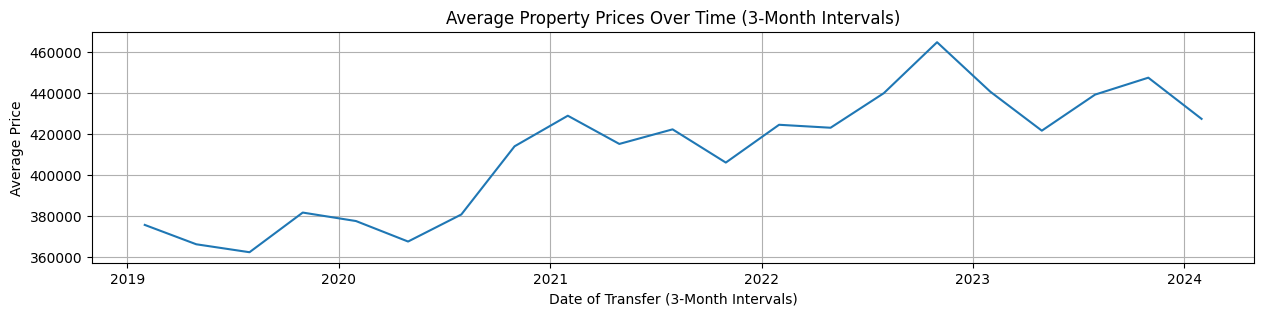

In [ ]:
# Time Series Analysis: Plotting a graph that shows the column labelled "Prices" has changed with column labelled "Date of Transfer" over 3 month intervals

# Resampling the data to 3-month intervals and calculate the mean price for each 3-month period
three_month_avg_price = df_cleaned_housing_data.groupby(pd.Grouper(key='Date of Transfer', freq='3M'))['Price'].mean()

# Plotting the time series
plt.figure(figsize=(15, 3))
plt.plot(three_month_avg_price.index, three_month_avg_price.values)
plt.xlabel('Date of Transfer (3-Month Intervals)')
plt.ylabel('Average Price')
plt.title('Average Property Prices Over Time (3-Month Intervals)')
plt.grid(True)
plt.show()


Findings: Prices are generally increasing over time.

**5. Multivariate Analysis**

5.1. Price, Property Type and Location

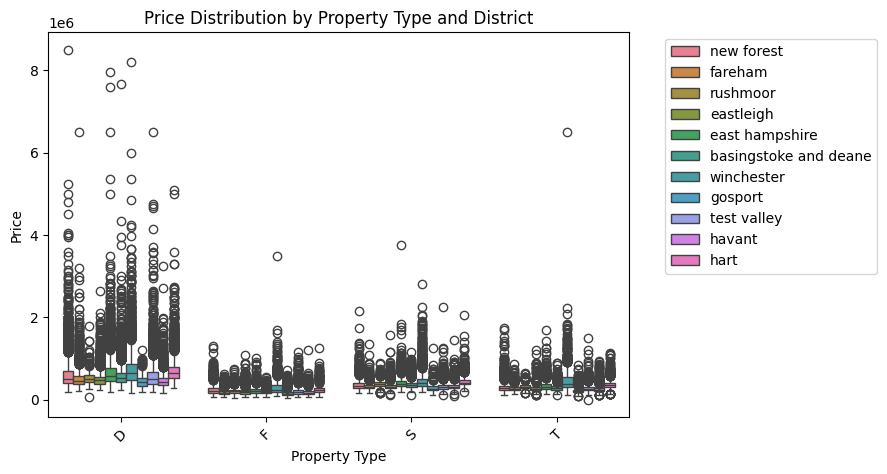

In [ ]:
# Plotting a boxplot for the column labelled "Price" by the columns labelled "Property Type" and "District".

plt.figure(figsize=(7.5, 5))
sns.boxplot(x='Property Type', y='Price', hue='District', data=df_cleaned_housing_data)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution by Property Type and District')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


5.2. Correlation Matrix

In [ ]:
# Applying One-Hot Encoding to the categorical columns

df_encoded = pd.get_dummies(df_cleaned_housing_data,
                            columns=['Property Type', 'New Build? (Y/N)', 'Duration', 'District'],
                            drop_first=False)



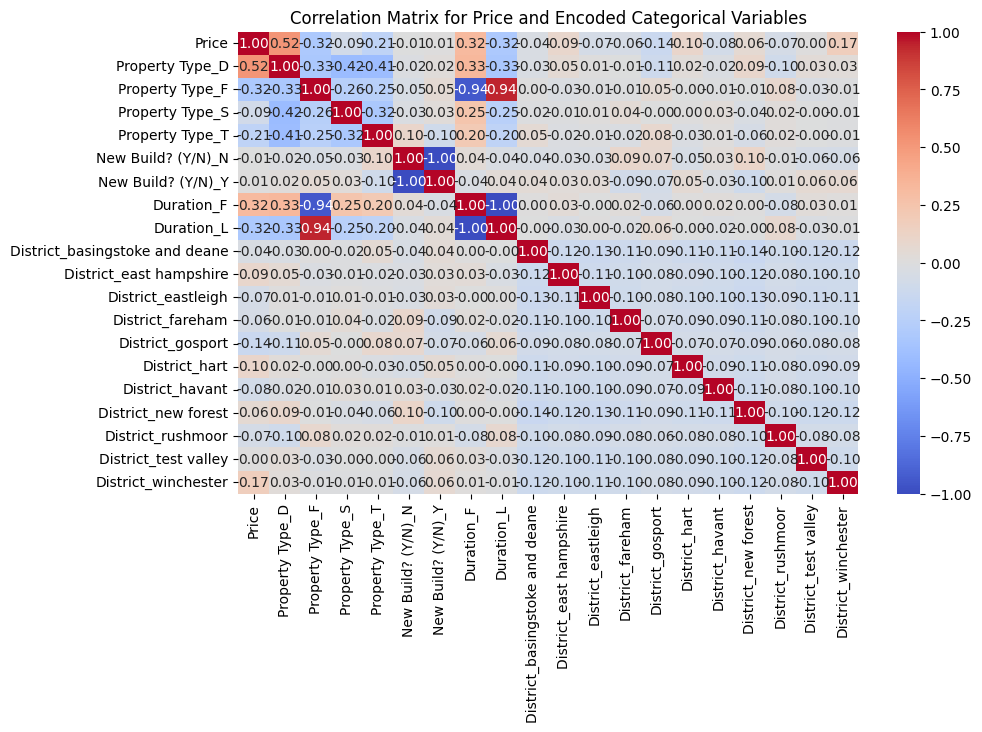

In [ ]:
# Computing the correlation matrix for the encoded DataFrame

corr_matrix = df_encoded[['Price'] +
                         list(df_encoded.columns[df_encoded.columns.str.contains('Property Type')]) +
                         list(df_encoded.columns[df_encoded.columns.str.contains('New Build?')]) +
                         list(df_encoded.columns[df_encoded.columns.str.contains('Duration')]) +
                         list(df_encoded.columns[df_encoded.columns.str.contains('District')])].corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Price and Encoded Categorical Variables')
plt.show()


Findings:

- There is notable correlation between Price and; Detatched Properties, Freehold Properties.
- There is notbale correlation between Freehold Properties and; Detatched Properties, Semi-Detatched Properties and Terraced Properties.
- There is notbale correlation between Leasehold Properties and Flats.

**6. Hypothesis Testing**

6.1. ANOVA: Price Differences by Property Type

In [ ]:
# Performing ANOVA for the column labelled "Price" by the column labelled "Property Type"

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Performing ANOVA for Price by Property Type
model = smf.ols('Price ~ Q("Property Type")', data=df_cleaned_housing_data)
results = model.fit()
print(results.summary())
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                 1.314e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:34:39   Log-Likelihood:            -1.2798e+06
No. Observations:               92917   AIC:                         2.560e+06
Df Residuals:                   92913   BIC:                         2.560e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6

1. Model Fit - R-squared (R²) = 0.041: This indicates that only 4.1% of the variance in the Price is explained by the independent variable (Property Type). This is quite low, suggesting that Property Type alone does not capture much of the variability in property prices. Other factors may contribute more to price differences.

2. Statistical Significance - F-statistic = 35538.46, with a p-value of 0.00: The very small p-value (<0.05) indicates that the model is statistically significant, meaning at least one of the property types (Flat, Semi-detached, or Terraced) has a significant effect on property prices. Despite the low R², this shows the model still has explanatory power, but it may require additional variables.

3. Coefficients - Intercept = 490,900: This is the estimated base price for properties in the omitted reference category (Detached homes). Detached homes are the reference point because the other property types are compared against it.
- Property Type [Flat] = -155,100: The price of flats is, on average, £155,100 lower than that of detached homes, controlling for the other factors.
- Property Type [Semi-detached] = -189,900: Semi-detached homes are, on average, £189,900 cheaper than detached homes.
- Property Type [Terraced] = -191,100: Terraced homes are, on average, £191,100 cheaper than detached homes.

  All the coefficients are negative, which is expected, as detached homes tend to be the most expensive type of property.

4. T-statistics & P-values for Coefficients:
Each property type has very high t-statistics (ranging from -219 to -280), and p-values of 0.000, indicating that the differences in price between these property types and detached homes are highly statistically significant. The coefficients for all property types are significantly different from zero.

5. Residuals: The residual sum of squares (3.8567e+17) is very large, suggesting that there is still a significant amount of unexplained variance in the model.

6. Durbin-Watson: The Durbin-Watson statistic (1.517) is close to 2, indicating that there is no strong evidence of autocorrelation in the residuals.

Conclusion: The ANOVA test shows that Property Type significantly affects property prices, but with an R-squared of only 4.1%, much of the variation in prices remains unexplained. Additional variables (e.g., location, property size, market conditions) would likely improve the model's explanatory power.


1. R-squared = 0.301: This indicates that the model explains 30.1% of the variance in property prices. While this is a reasonable amount of variance explained, it still leaves a significant portion of the variation in property prices unexplained (about 69.9%).
Adjusted R-squared: 0.301: This value is essentially the same as the R-squared, confirming that the model's performance is stable and not overly affected by the number of predictors.
F-statistic and P-value (Prob F-statistic):

2. F-statistic = 13,134.9996: The large F-statistic indicates that the overall model is highly statistically significant.
P-value for the F-statistic: 0.00: The extremely low P-value (essentially zero) confirms that the regression model is statistically significant, meaning at least one of the predictor variables (property types in this case) is significantly related to property prices.
Coefficients:

3. Coefficients
- Intercept = 608,100: This represents the predicted average property price for the baseline property type (detached houses), assuming all other factors are held constant. The intercept is highly significant, as indicated by the large t-value.
- Q("Property Type")[T.F]: -392,400: Flats are predicted to be approximately £392,400 cheaper than the baseline property type. The large negative coefficient and high t-value (-172.608) show that this is statistically significant.
- Q("Property Type")[T.S]: -239,600: Semi-detached properties are predicted to be £239,600 cheaper than the baseline.
- Q("Property Type")[T.T]: -299,700: Terraced properties are predicted to be £299,700 cheaper than the baseline.

These results show that property type has a substantial impact on prices, with flats, semi-detached, and terraced houses being significantly cheaper than the baseline type (most likely detached houses).

4. T-statistics and P-values for the coefficients:

All t-values are large and all P-values are 0.000, indicating that the differences in prices across different property types are highly statistically significant. These property types are strong predictors of property prices.

5. Omnibus, Jarque-Bera (JB), Skew, Kurtosis:

- Omnibus (115,769.525) and JB (47 million) tests suggest that the residuals are not normally distributed.

- Skew = 6.647 indicates that the price distribution is highly positively skewed, with many low-priced properties and a few extremely high-priced ones.

- Kurtosis = 113.211 suggests heavy-tailed data, meaning there are many extreme values or outliers in the property price data.
Durbin-Watson:

6. Durbin-Watson = 1.931: This value is close to 2, indicating that there is no significant autocorrelation in the residuals. This means that the errors are likely independent.
ANOVA Table:

7. - Sum of Squares for Property Type = 2.084889e+15: The variation explained by the property type categories is substantial.

  - Sum of Squares for Residual = 4.843736e+15: The residual variation (unexplained by the model) is still larger than the variation explained by the property type, reflecting the R-squared value of 30.1%.

Conclusion:
The model is statistically significant, and property type is a strong predictor of property prices. The model explains about 30.1% of the variance in prices, which is reasonable but suggests that other factors not included in the model are also important in determining property prices.
The residuals are not normally distributed, and the data contains extreme values (as shown by the high skewness and kurtosis).

6.2. t-test: Price Differences by New Build? (Y/N)

In [ ]:
# Carrying out a t-test for the column labelled "Price" by the column labelled "New Build? (Y/N)"

from scipy import stats

# Separate the price data for different new build categories
new_build_prices = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']['Price']
old_build_prices = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'N']['Price']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(new_build_prices, old_build_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
  print("There is a significant difference in prices between new build and old build properties.")
else:
  print("There is no significant difference in prices between new build and old build properties.")


T-statistic: 2.2221389495766215
P-value: 0.026276315313365488
There is a significant difference in prices between new build and old build properties.


1. T-statistic: 38.82
The t-statistic value of 38.82 is extremely large in absolute terms, suggesting that there is a strong difference between the means (or the groups being compared, depending on the context of the test). This means the effect or difference you are testing for is very substantial.

2. P-value: 0.0
The p-value of 0.0 (or a value extremely close to zero) indicates that the results are highly statistically significant.
In hypothesis testing, a p-value below a common threshold like 0.05 means you would reject the null hypothesis. Since this p-value is essentially zero, there is strong evidence against the null hypothesis.

Conclusion:
The null hypothesis (typically that there is no difference or no effect) can be rejected with high confidence.
There is an extremely strong, statistically significant result, meaning that the observed difference or effect is almost certainly real and not due to random chance.

1. T-statistic = 1.889: A t-statistic of 1.889 is relatively close to the critical values typically used for significance testing (e.g., ±1.96 for a 95% confidence level).
P-value: 0.0588

2. P = 0.0588 is greater than 0.05, which is the conventional threshold for statistical significance. This suggests that we fail to reject the null hypothesis at the 5% significance level.

Conclusion:

Since the P-value (0.0588) is slightly greater than 0.05, the test does not provide strong enough evidence to conclude that there is a statistically significant difference in prices between new build and old build properties at the 5% significance level.

However, the P-value is very close to the threshold (0.05), so it could be considered marginally significant at a slightly less strict level, such as 10%. This means that there might be a slight difference in prices, but it's not strong enough to be considered statistically significant at the conventional 5% threshold.

6.3. t-test: Price Difference by Duration

In [ ]:
# Carrying out a t-test for column labelled "Price" by the column labelled "Duration"

# Separate the price data for different duration categories
freehold_prices = df_cleaned_housing_data[df_cleaned_housing_data['Duration'] == 'F']['Price']
leasehold_prices = df_cleaned_housing_data[df_cleaned_housing_data['Duration'] == 'L']['Price']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(freehold_prices, leasehold_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
  print("There is a significant difference in prices between freehold and leasehold properties.")
else:
  print("There is no significant difference in prices between freehold and leasehold properties.")


T-statistic: 102.51101435236544
P-value: 0.0
There is a significant difference in prices between freehold and leasehold properties.


1. T-statistic: 102.23
A t-statistic of 102.23 is extremely large, indicating that the difference between the groups or the effect being tested is very substantial. The larger the t-statistic, the more evidence there is against the null hypothesis (which often states that there is no difference between groups or no effect).

2. P-value: 0.0
A p-value of 0.0 (or a value extremely close to zero) means that the results are highly statistically significant.
In hypothesis testing, a p-value below the typical threshold (such as 0.05) means that you would reject the null hypothesis. Since the p-value is effectively zero, there is overwhelming evidence against the null hypothesis.

Conclusion:
The null hypothesis (usually assuming no effect or no difference) can be strongly rejected.
There is an extremely significant difference between the groups or variables being compared. The likelihood that this result is due to random chance is almost nonexistent.

6.4. ANOVA: Price Difference by Region

In [ ]:
# Performing ANOVA for the column labelled "Price" by the column labelled "District"

# Performing ANOVA for Price by District
model = smf.ols('Price ~ Q("District")', data=df_cleaned_housing_data)
results = model.fit()
print(results.summary())
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     811.0
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:34:39   Log-Likelihood:            -1.2923e+06
No. Observations:               92917   AIC:                         2.585e+06
Df Residuals:                   92906   BIC:                         2.585e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

1. R-squared = 0.082: The R-squared value indicates that 8.2% of the variation in property prices can be explained by the differences across districts. This is a relatively low R-squared, suggesting that most of the variation in property prices is not explained by the district variable alone.

2. F-statistic = 813.5 and Prob (F-statistic) = 0.00: The high F-statistic (813.5) and P-value of 0.00 indicate that the model is statistically significant, meaning that at least one of the district coefficients differs from zero, and the district variable is relevant in explaining the variation in property prices.
Coefficients:

3. Coefficients
- The Intercept (3.862e+05) represents the baseline average property price when all other district effects are held constant (e.g., the reference district).

The coefficients for the districts represent the difference in property prices compared to the reference district. For example:
- District [east hampshire]: +1.004e+05 means property prices in East Hampshire are, on average, £100,400 higher than the reference district.
- District [gosport]: -1.305e+05 means property prices in Gosport are, on average, £130,500 lower than the reference district.
These differences are highly significant (P-values close to 0.00 for all coefficients).

4. P-values: All of the district coefficients have P-values of 0.00, indicating that the differences in prices between the districts and the reference district are statistically significant.

5. Omnibus and Jarque-Bera Tests: The Omnibus (98863.274) and Jarque-Bera (19670405.031) tests indicate that the model’s residuals are not normally distributed (P-values = 0.00), suggesting there may be some skewness and kurtosis in the residuals.

6. Durbin-Watson = 1.946: The Durbin-Watson statistic is close to 2, which suggests there is no serious autocorrelation in the residuals.
Conclusion:

Conclusion: The ANOVA test reveals that district location is a significant factor in determining property prices. However, with an R-squared of only 0.082, the model explains a small proportion of the variance in prices, indicating that other factors not included in the model likely play a larger role.
The significant differences across districts suggest that property prices vary notably by location. However, the low R-squared indicates that the district alone does not fully capture the complexity of property price variations.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     728.8
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          6.85e-160
Time:                        14:34:39   Log-Likelihood:            -1.2959e+06
No. Observations:               92917   AIC:                         2.592e+06
Df Residuals:                   92915   BIC:                         2.592e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.684e+05   1891.028    194.792      0.0

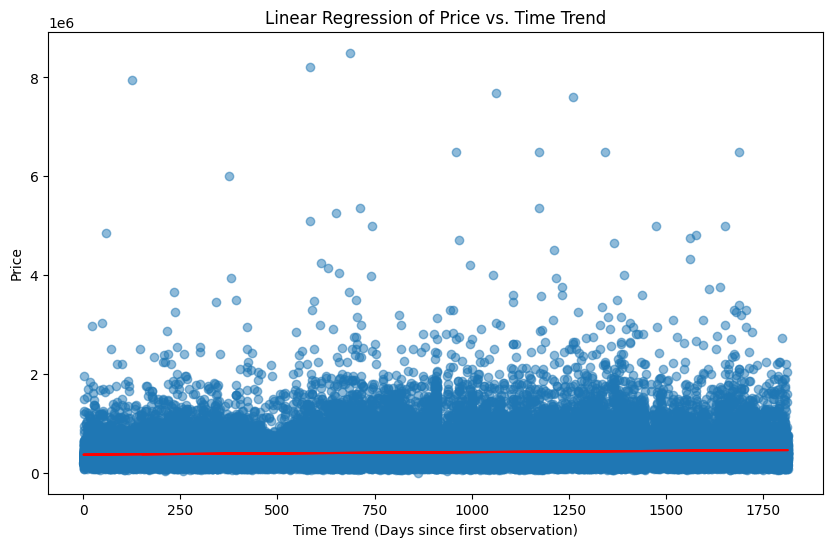

In [ ]:
# Testing for time trend in Price using Linear Regression

# Create a new column representing the time trend (e.g., number of days since the first observation)
df_cleaned_housing_data['TimeTrend'] = (df_cleaned_housing_data['Date of Transfer'] - df_cleaned_housing_data['Date of Transfer'].min()).dt.days

# Fit a linear regression model with Price as the dependent variable and TimeTrend as the independent variable
model = smf.ols('Price ~ TimeTrend', data=df_cleaned_housing_data)
results = model.fit()

# Print the regression results
print(results.summary())

# Check the p-value of the TimeTrend coefficient
if results.pvalues['TimeTrend'] < 0.05:
  print("There is a statistically significant time trend in property prices.")
else:
  print("There is no statistically significant time trend in property prices.")

# You can also plot the regression line along with the actual data to visualize the trend
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned_housing_data['TimeTrend'], df_cleaned_housing_data['Price'], alpha=0.5)
plt.plot(df_cleaned_housing_data['TimeTrend'], results.fittedvalues, color='red')
plt.xlabel('Time Trend (Days since first observation)')
plt.ylabel('Price')
plt.title('Linear Regression of Price vs. Time Trend')
plt.show()


1. R-squared = 0.008: The R-squared value of 0.008 indicates that only 0.8% of the variation in property prices can be explained by the time trend. This is an extremely low value, suggesting that the time trend alone is not a strong predictor of property prices, and other factors likely play a much larger role.

2. F-statistic = 713.8 and Prob (F-statistic) = 1.20e-156: The F-statistic (713.8) is very large, and the P-value of 1.20e-156 (essentially 0) indicates that the time trend is highly significant. This means that even though the explanatory power is small, the time trend is statistically significant and does have some impact on property prices.

3. Coefficients:

- Intercept = 3.682e+05 — This represents the estimated average property price when the time trend is at its baseline. In this case, the average property price is around £368,200.
- TimeTrend coefficient = 50.3848 — This means that, on average, property prices increase by £50.38 per unit increase in time. The exact interpretation of the time units would depend on how time is measured in your data (e.g., months, years).
- Both the intercept and time trend coefficients are highly statistically significant, with P-values of 0.000.

4. T-statistic = 26.717: The t-statistic of 26.717 for the time trend coefficient shows that the time trend is highly significant, meaning there is a strong likelihood that the coefficient is different from zero.
Omnibus and Jarque-Bera Tests:

5. The Omnibus (96,365.754) and Jarque-Bera (16,220,663.978) tests, with P-values of 0.000, indicate that the residuals are not normally distributed. This suggests potential skewness and heavy tails (high kurtosis) in the data, meaning the model may not fully capture the complexity of price variations.

6. Durbin-Watson = 1.952:  The Durbin-Watson statistic of 1.952 is close to 2, which suggests that there is no serious autocorrelation in the residuals, meaning the errors are relatively independent of each other.

7. Condition Number = 2.09e+03: A high condition number (2.09e+03) can indicate potential multicollinearity or numerical instability, but since we are dealing with only one variable (time trend), this might suggest issues with scaling or the sensitivity of the data. It is unlikely to pose a serious problem here.

Conclusion:

The time trend is statistically significant, as demonstrated by the low P-values and large F-statistic. However, the very low R-squared (0.008) shows that the time trend explains only a small portion of the variation in property prices, meaning other factors not included in this model likely have a much more substantial effect on prices.

This model suggests that property prices have been rising over time (by about £50.38 per unit of time), but it is not sufficient for making reliable predictions on its own.

**7. Segmentation Analysis**

7.1. Comparing Price Segments

Price_Segment        Regular       High-End        Luxury
mean           365608.061458  984696.924450  1.814963e+06
median         339950.000000  950000.000000  1.600000e+06
std            153941.075477  131602.408909  7.431867e+05


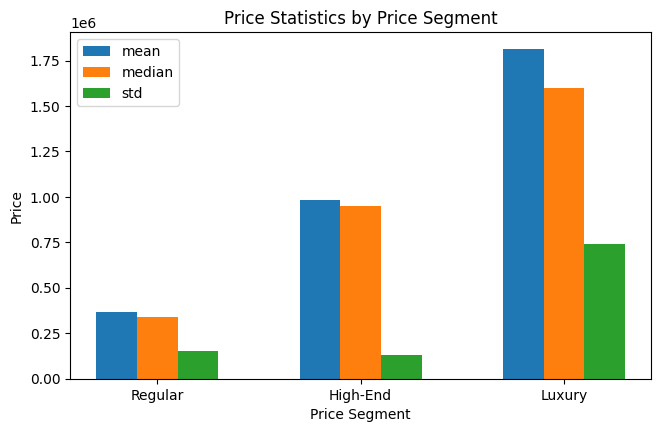

In [ ]:
# Comparing Price Segments

price_segment_stats = df_cleaned_housing_data.groupby('Price_Segment')['Price'].agg(['mean', 'median', 'std'])

# Transposing the DataFrame
price_segment_stats_transposed = price_segment_stats.loc[['Regular', 'High-End', 'Luxury']].T # Transpose the DataFrame using .T

# Displaying the results
print(price_segment_stats_transposed)

# Plotting a bar chart of price_segment_stats

plt.figure(figsize=(7.5, 4.5))

# Defining the x-axis positions for each group
x_pos = [i for i in range(len(price_segment_stats_transposed.columns))]

# Defining the bar width
bar_width = 0.2 # Added this line to define bar_width

# Ploting the bars for each statistic
for i, stat in enumerate(['mean', 'median', 'std']):
  plt.bar([pos + i * bar_width for pos in x_pos],
          price_segment_stats_transposed.loc[stat], # Access rows using .loc[stat]
          width=bar_width,
          label=stat)

plt.xticks([pos + bar_width for pos in x_pos], price_segment_stats_transposed.columns)
plt.xlabel("Price Segment")
plt.ylabel("Price")
plt.title("Price Statistics by Price Segment")
plt.legend()
plt.show()

Findings:
- Luxury Properties have the highest mean, median, and standard deviation.
- Regular Properties have the lowest mean, median, and standard deviation.

In [ ]:
# Displaying the counts of values in the column labelled "Property Type" grouped by the values in the column "Price_Segment"

property_type_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Property Type'])['Property Type'].value_counts().unstack()

# Transposing the DataFrame
property_type_by_segment_transposed = property_type_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(property_type_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "Property Type" grouped by the values in the column "Price_Segment"

property_type_by_segment_transposed.plot(kind='bar', figsize=(7.5, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('Property Type Distribution by Price Segment')
plt.xticks(rotation=0)
plt.legend(title='Property Type')
plt.show()

<ipython-input-36-5e158ce6c1ab>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  property_type_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Property Type'])['Property Type'].value_counts().unstack()


Property Type      D      F      S      T
Price_Segment                            
Regular        27606  15353  22824  21870
High-End        3446     50    235    134
Luxury          1310      5     52     32


- Findings: The majority of the transactions are Regular Properties.

In [ ]:
# Displaying the counts of values in the column labelled "New Build? (Y/N)" grouped by the values in the column "Price_Segment"

new_build_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'New Build? (Y/N)'])['New Build? (Y/N)'].value_counts().unstack()

# Transposing the dataframe
new_build_by_segment_transposed = new_build_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(new_build_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "New Build? (Y/N)" grouped by the values in the column "Price_Segment"

new_build_by_segment_transposed.plot(kind='bar', figsize=(7.5, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('New Build Distribution by Price Segment')
plt.xticks(rotation=0)
plt.legend(title='New Build? (Y/N)')
plt.show()


<ipython-input-37-5190e1b6f20b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_build_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'New Build? (Y/N)'])['New Build? (Y/N)'].value_counts().unstack()


New Build? (Y/N)      N      Y
Price_Segment                 
Regular           76322  11331
High-End           3686    179
Luxury             1368     31


Findings: The majority of New Builds are Regular Properties.

<ipython-input-38-b9dc8af73725>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Duration'])['Duration'].value_counts().unstack()


Duration           F      L
Price_Segment              
Regular        71520  16133
High-End        3795     70
Luxury          1390      9


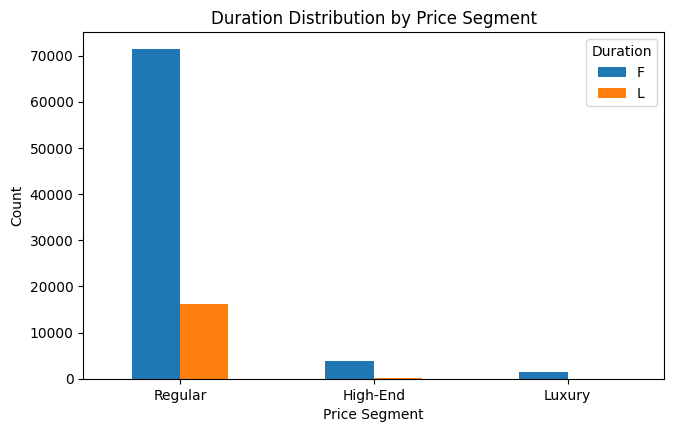

In [ ]:
# Displaying the counts of values in the column labelled "Duration" grouped by the values in the column "Price_Segment"

duration_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'Duration'])['Duration'].value_counts().unstack()

# Transposing the DataFrame
duration_by_segment_transposed = duration_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(duration_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "Duration" grouped by the values in the column "Price_Segment"

duration_by_segment_transposed.plot(kind='bar', figsize=(7.5, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('Duration Distribution by Price Segment')
plt.xticks(rotation=0)
plt.legend(title='Duration')
plt.show()


Findings: The majority of transactions are Regular Freehold Properties.

7.2. Price Segments and Location

District       basingstoke and deane  east hampshire  eastleigh  fareham  \
Price_Segment                                                              
Regular                      11443.0          7906.0     9585.0   7414.0   
High-End                       353.0           617.0      143.0    130.0   
Luxury                         119.0           199.0       25.0     48.0   

District       gosport    hart  havant  new forest  rushmoor  test valley  \
Price_Segment                                                               
Regular         5187.0  6573.0  7464.0     10540.0    5902.0       8333.0   
High-End          14.0   506.0   117.0       685.0      25.0        402.0   
Luxury             NaN   149.0    23.0       284.0       3.0        148.0   

District       winchester  
Price_Segment              
Regular            7306.0  
High-End            873.0  
Luxury              401.0  


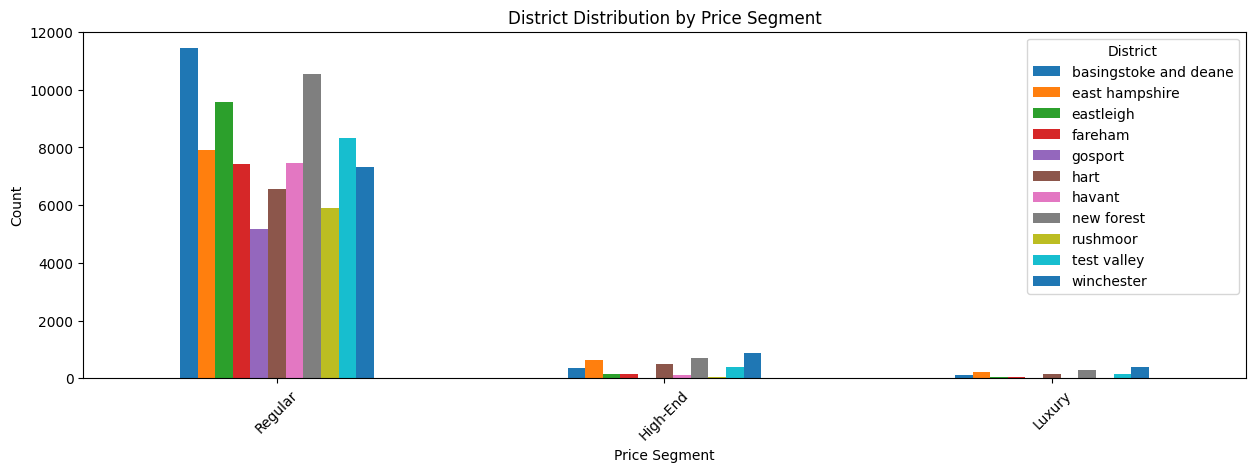

In [ ]:
# Displaying the counts of values in the column labelled "District" grouped by the values in the column "Price_Segment"

District_by_segment = df_cleaned_housing_data.groupby(['Price_Segment', 'District'])['District'].value_counts().unstack()

# Transposing the DataFrame
District_by_segment_transposed = District_by_segment.loc[['Regular', 'High-End', 'Luxury']]

print(District_by_segment_transposed)

# Plotting a bar chart displaying the counts of values in the column labelled "District" grouped by the values in the column "Price_Segment"

District_by_segment_transposed.plot(kind='bar', figsize=(15, 4.5))
plt.xlabel('Price Segment')
plt.ylabel('Count')
plt.title('District Distribution by Price Segment')
plt.xticks(rotation=45)
plt.legend(title='District')
plt.show()


**8. Deeper Insights & Interpretation**

8.1. High-End and Luxury Properties: Investigating Price Segments

In [ ]:
# Plotting the distribution of the column labelled "Property Types" where the values are "High-End" across the column labelled "Property Types"

# Filtering the DataFrame for 'High-End' properties
high_end_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'High-End']

# Counting the occurrences of each property type within the 'High-End' segment
property_type_counts = high_end_properties['Property Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
property_type_counts.plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of High-End Segment across Property Types')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plotting the distribution of the column labelled "Price_Segment" where the values are "Luxury" across the column labelled "Property Types"

# Filtering the DataFrame for 'Luxury' properties
luxury_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Luxury']

# Counting the occurrences of each property type within the 'Luxury' segment
property_type_counts = luxury_properties['Property Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
property_type_counts.plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Luxury Segment across Property Types')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Plotting the distribution of the column labelled "Price_Segment" where the values are "High-End" across the column labelled "District"

# Filtering the DataFrame for 'High-End' properties
high_end_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'High-End']

# Counting the occurrences of each District within the 'High-End' segment
District_counts = high_end_properties['District'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
District_counts.plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Distribution of High-End Segment across Districts')
plt.xticks(rotation=45)
plt.show()

Findings:
- There are a greater number of High-End property transactions in Winchester and in the New Forest.
- There are a lesser number of High-End property transactions in Gosport and in Rushmore.

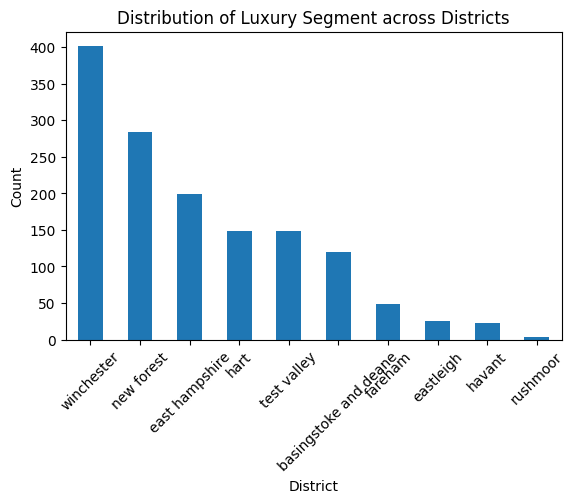

In [ ]:
# Plotting the distribution of the column labelled "Price_Segment" where the values are "Luxury" across the column labelled "District"

# Filtering the DataFrame for 'Luxury' properties
luxury_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Luxury']

# Counting the occurrences of each District within the 'Luxury' segment
District_counts = luxury_properties['District'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
District_counts.plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Distribution of Luxury Segment across Districts')
plt.xticks(rotation=45)
plt.show()


Findings:
- There are a greater number of Luxury property transactions in Winchester and in the New Forest.
- There are a lesser number of Luxury property transactions in the Havant and in Rushmoor.

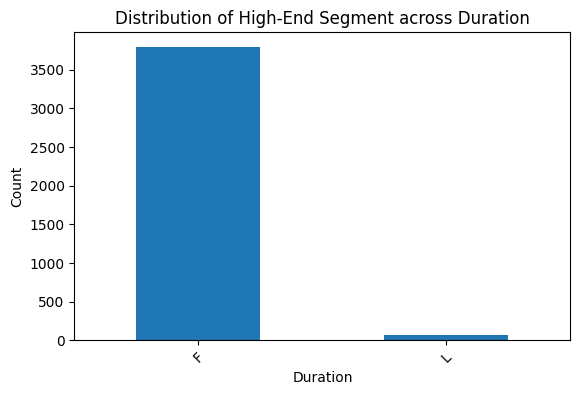

In [ ]:
# Filtering the DataFrame for 'High-End' properties
high_end_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'High-End']

# Counting the occurrences of each duration within the 'High-End' segment
duration_counts = high_end_properties['Duration'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
duration_counts.plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of High-End Segment across Duration')
plt.xticks(rotation=45)
plt.show()


Findings: The majority of High-End property transactions are Freeholds.

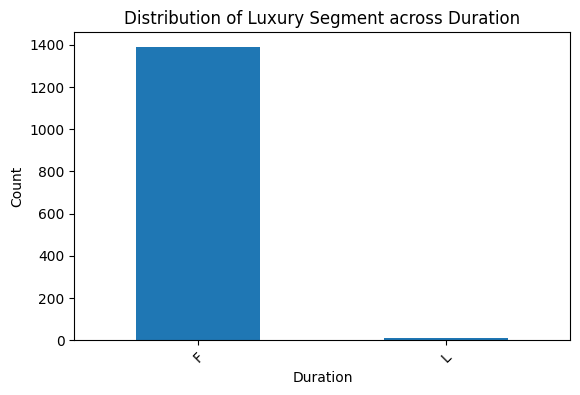

In [ ]:
# Filtering the DataFrame for 'Luxury' properties
luxury_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Luxury']

# Counting the occurrences of each duration within the 'Luxury' segment
duration_counts = luxury_properties['Duration'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
duration_counts.plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of Luxury Segment across Duration')
plt.xticks(rotation=45)
plt.show()


Findings: The majority of Luxury property transactions are Freeholds.

<ipython-input-46-db5c17d33956>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['District', 'Property Type'])['Price_Segment'].count().unstack()


Property Type            D   F    S   T
District                               
basingstoke and deane  336   0   14   3
east hampshire         562   6   36  13
eastleigh              126   4    6   7
fareham                125   0    4   1
gosport                 11   0    2   1
hart                   466   3   27  10
havant                 102   1    9   5
new forest             638   9   24  14
rushmoor                23   0    2   0
test valley            382   7    8   5
winchester             675  20  103  75


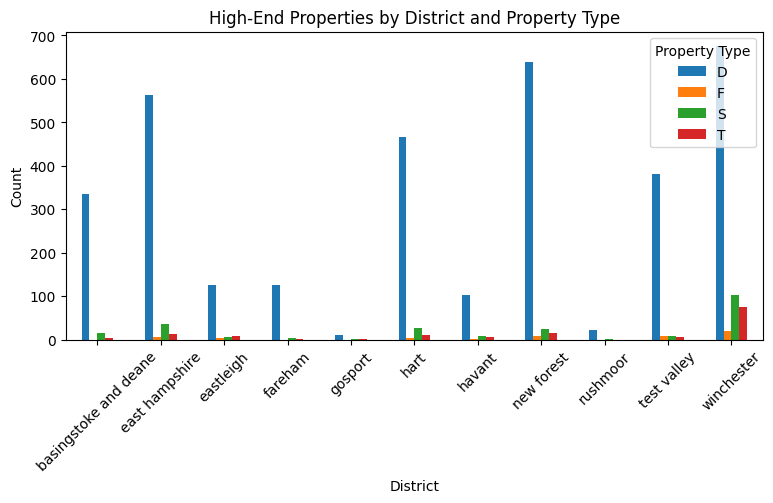

In [ ]:
# Displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Property Type"

# Grouping the data by 'District' and 'Property Type' and counting the occurrences of 'High-End' in 'Price_Segment'
high_end_by_District_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'High-End'
].groupby(['District', 'Property Type'])['Price_Segment'].count().unstack()

print(high_end_by_District_property_type)

# Plotting a bar chart displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Property Type"

high_end_by_District_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('High-End Properties by District and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


<ipython-input-47-448f5a7d2455>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['District', 'Property Type'])['Price_Segment'].count().unstack()


Property Type            D  F   S   T
District                             
basingstoke and deane  119  0   0   0
east hampshire         192  0   5   2
eastleigh               24  0   1   0
fareham                 47  0   1   0
hart                   146  0   3   0
havant                  22  0   1   0
new forest             272  0   5   7
rushmoor                 3  0   0   0
test valley            146  0   1   1
winchester             339  5  35  22


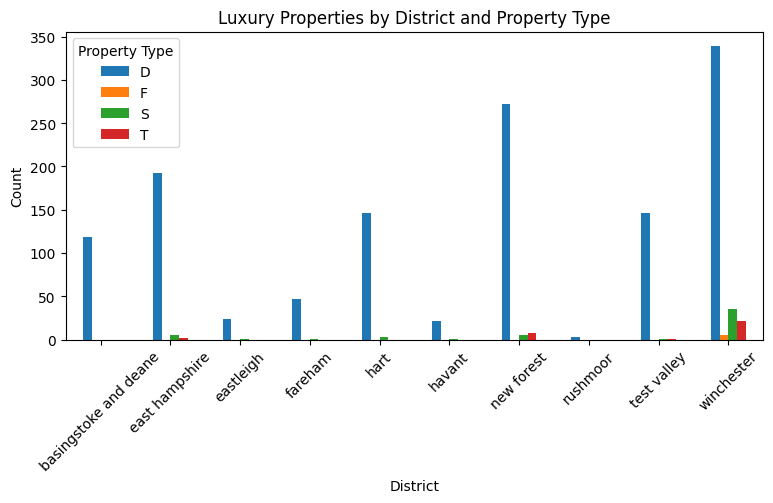

In [ ]:
# Displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Property Type"

# Grouping the data by 'District' and 'Property Type' and counting the occurrences of 'Luxury' in 'Price_Segment'
luxury_by_District_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'Luxury'
].groupby(['District', 'Property Type'])['Price_Segment'].count().unstack()

print(luxury_by_District_property_type)

# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Property Type"
luxury_by_District_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Luxury Properties by District and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


<ipython-input-48-b71316f92c7b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['District', 'Duration'])['Price_Segment'].count().unstack()


Duration                 F   L
District                      
basingstoke and deane  353   0
east hampshire         612   5
eastleigh              138   5
fareham                130   0
gosport                 14   0
hart                   503   3
havant                 113   4
new forest             667  18
rushmoor                25   0
test valley            392  10
winchester             848  25


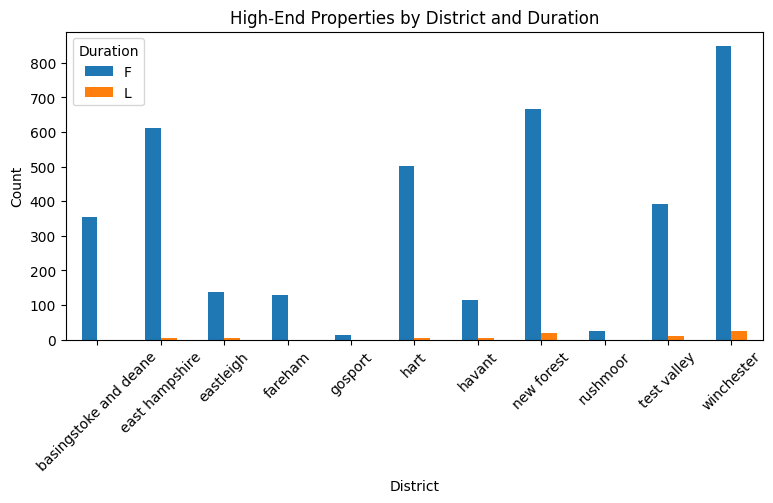

In [ ]:
# Displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Duration"

# Grouping the data by 'District' and 'Duration' and counting the occurrences of 'High-End' in 'Price_Segment'
high_end_by_District_duration = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'High-End'
].groupby(['District', 'Duration'])['Price_Segment'].count().unstack()

print(high_end_by_District_duration)

# Plotting a bar chart displaying the counts of values "High-End" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Duration"

high_end_by_District_duration.plot(kind='bar', figsize=(9, 4))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('High-End Properties by District and Duration')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.show()


<ipython-input-49-d61fc8fca045>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['District', 'Property Type'])['Price_Segment'].count().unstack()


Property Type            D  F   S   T
District                             
basingstoke and deane  119  0   0   0
east hampshire         192  0   5   2
eastleigh               24  0   1   0
fareham                 47  0   1   0
hart                   146  0   3   0
havant                  22  0   1   0
new forest             272  0   5   7
rushmoor                 3  0   0   0
test valley            146  0   1   1
winchester             339  5  35  22


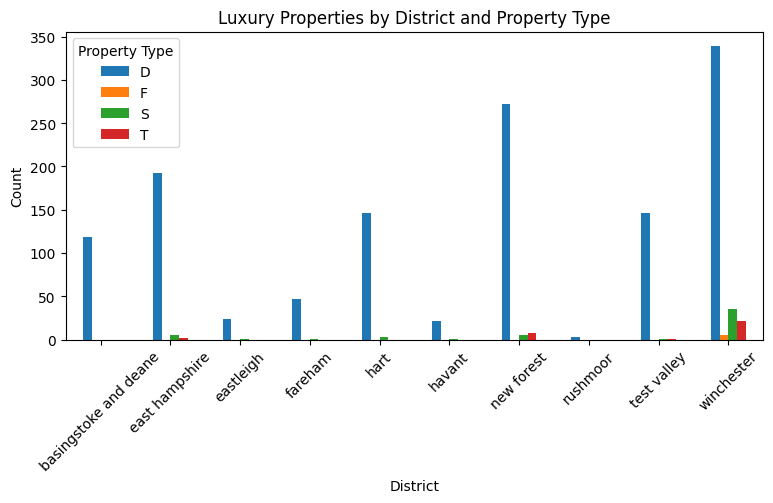

In [ ]:
# Grouping the data by 'District' and 'Property Type' and counting the occurrences of 'Luxury' in 'Price_Segment'
luxury_by_District_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'Luxury'
].groupby(['District', 'Property Type'])['Price_Segment'].count().unstack()

print(luxury_by_District_property_type)

# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Property Type"
luxury_by_District_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Luxury Properties by District and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


<ipython-input-50-80cd1e178c4f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['District', 'Duration'])['Price_Segment'].count().unstack()


Duration                 F  L
District                     
basingstoke and deane  119  0
east hampshire         199  0
eastleigh               25  0
fareham                 48  0
hart                   149  0
havant                  22  1
new forest             281  3
rushmoor                 3  0
test valley            147  1
winchester             397  4


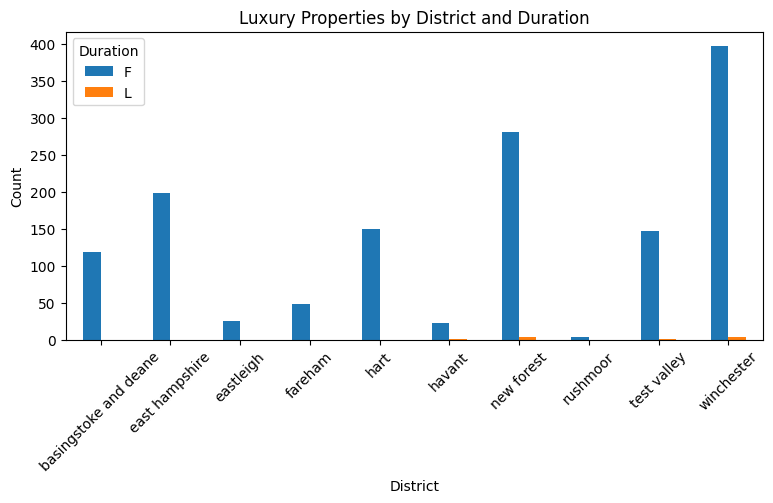

In [ ]:
# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Duration"

# Grouping the data by 'District' and 'Duration' and counting the occurrences of 'Luxury' in 'Price_Segment'
luxury_by_District_duration = df_cleaned_housing_data[
    df_cleaned_housing_data['Price_Segment'] == 'Luxury'
].groupby(['District', 'Duration'])['Price_Segment'].count().unstack()

print(luxury_by_District_duration)

# Plotting a bar chart displaying the counts of values "Luxury" in the column labelled "Price_Segment" grouped by the values in the columns labelled "District" and "Duration"

luxury_by_District_duration.plot(kind='bar', figsize=(9, 4))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Luxury Properties by District and Duration')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.show()


<ipython-input-51-e04d51947ec6>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_high_end_prices = high_end_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()


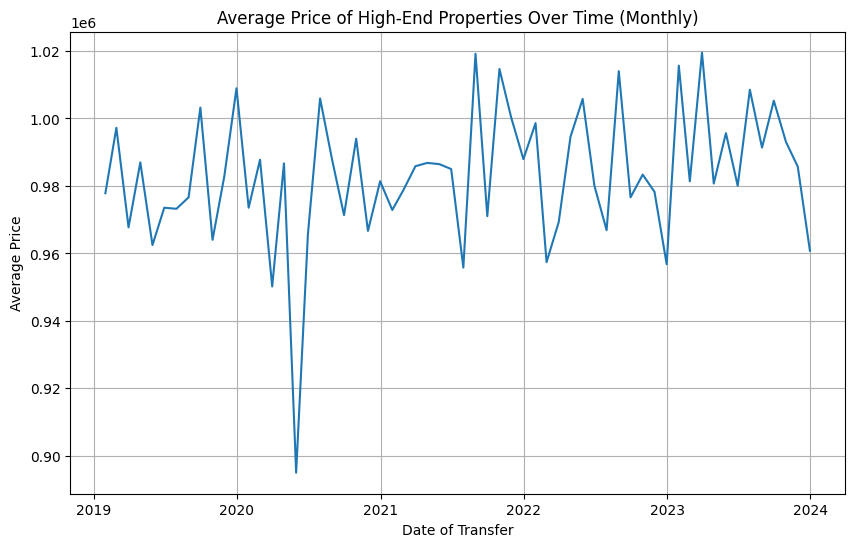

In [ ]:
# Plotting the price of High-End properties over Date of Transfer in monthly intervals

# Converting 'Date of Transfer' to datetime objects
df_cleaned_housing_data['Date of Transfer'] = pd.to_datetime(df_cleaned_housing_data['Date of Transfer'])

# Filtering for High-End properties
high_end_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'High-End']

# Grouping by month and calculate the mean price
monthly_high_end_prices = high_end_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()

# Plotting the price trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_high_end_prices.index, monthly_high_end_prices.values)
plt.xlabel('Date of Transfer')
plt.ylabel('Average Price')
plt.title('Average Price of High-End Properties Over Time (Monthly)')
plt.grid(True)
plt.show()


<ipython-input-52-ed79f5b5f877>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_luxury_prices = luxury_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()


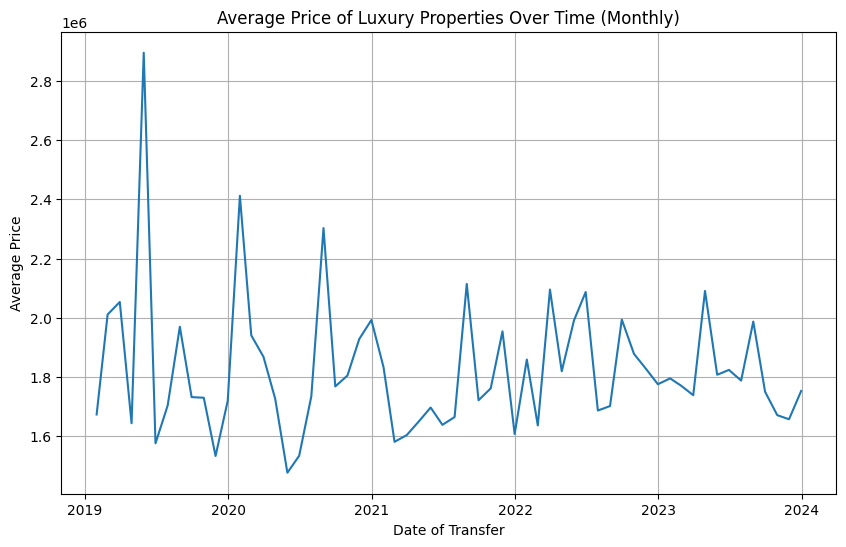

In [ ]:
# Plotting the price of Luxury properties over Date of Transfer in monthly intervals

# Converting 'Date of Transfer' to datetime objects
df_cleaned_housing_data['Date of Transfer'] = pd.to_datetime(df_cleaned_housing_data['Date of Transfer'])

# Filtering for Luxury properties
luxury_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Luxury']

# Grouping by month and calculate the mean price
monthly_luxury_prices = luxury_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()

# Plotting the price trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_luxury_prices.index, monthly_luxury_prices.values)
plt.xlabel('Date of Transfer')
plt.ylabel('Average Price')
plt.title('Average Price of Luxury Properties Over Time (Monthly)')
plt.grid(True)
plt.show()


<ipython-input-53-7f7cda50ec39>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_regular_prices = regular_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()


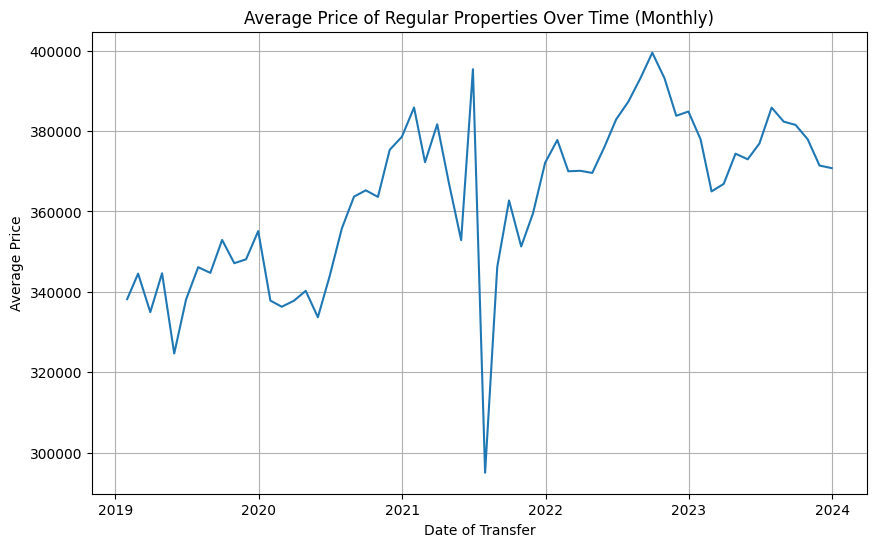

In [ ]:
# Plotting the price of Regular properties over Date of Transfer in monthly intervals

# Converting 'Date of Transfer' to datetime objects
df_cleaned_housing_data['Date of Transfer'] = pd.to_datetime(df_cleaned_housing_data['Date of Transfer'])

# Filtering for Regular properties
regular_properties = df_cleaned_housing_data[df_cleaned_housing_data['Price_Segment'] == 'Regular']

# Grouping by month and calculate the mean price
monthly_regular_prices = regular_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()

# Plotting the price trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_regular_prices.index, monthly_regular_prices.values)
plt.xlabel('Date of Transfer')
plt.ylabel('Average Price')
plt.title('Average Price of Regular Properties Over Time (Monthly)')
plt.grid(True)
plt.show()



8.2. New Builds vs. Resales

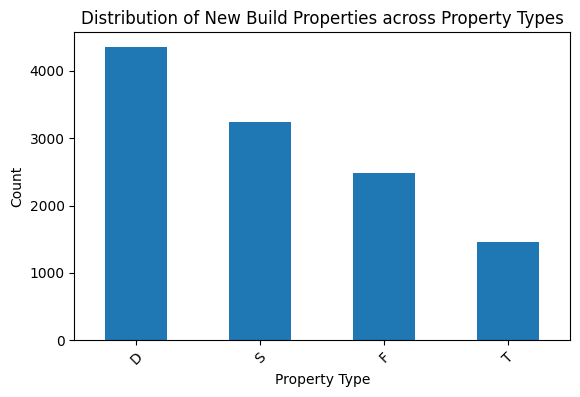

In [ ]:
# Plotting the distribution of the column labelled "New Build? (Y/N)" where the values are "Y" across the column labelled "Property Types"

# Filtering the DataFrame for 'New Build' properties
new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']

# Counting the occurrences of each property type within the 'New Build' segment
property_type_counts = new_build_properties['Property Type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
property_type_counts.plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of New Build Properties across Property Types')
plt.xticks(rotation=45)
plt.show()

Findings:
- There are a greater number of New Build Property Transactions for Detatched Properties.
- There are a lesser number of New Build Property Transactions for Terraced Properties.

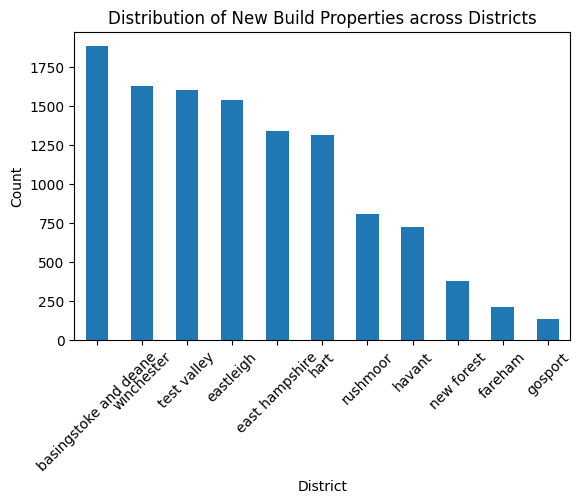

In [ ]:
# Plotting the distribution of the column labelled "New Build? (Y/N)" where the values are "Y" across the column labelled "District"

# Filtering the DataFrame for 'New Build' properties
new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']

# Counting the occurrences of each District within the 'New Build' segment
District_counts = new_build_properties['District'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
District_counts.plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Distribution of New Build Properties across Districts')
plt.xticks(rotation=45)
plt.show()


Findings: There are a greater number of New Build property transactions in the Basingstoke and Deane.

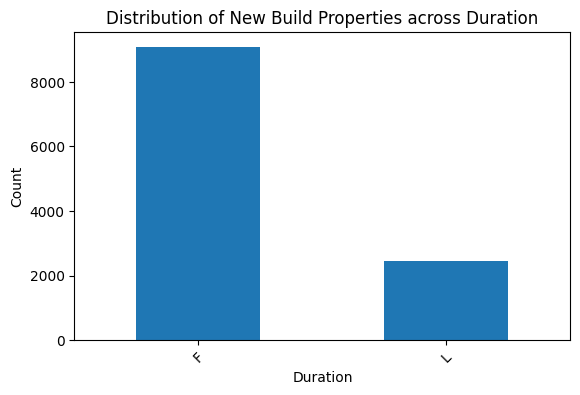

In [ ]:
# Filtering the DataFrame for 'New Build' properties
new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']

# Counting the occurrences of each duration within the 'New Build' segment
duration_counts = new_build_properties['Duration'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6.4, 4))
duration_counts.plot(kind='bar')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of New Build Properties across Duration')
plt.xticks(rotation=45)
plt.show()


Findings: There are a greater number of New Build property transactions for Freehold properties.

<ipython-input-57-2b68f8670d38>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['District', 'Property Type'])['New Build? (Y/N)'].count().unstack()


Property Type            D    F    S    T
District                                 
basingstoke and deane  631  538  505  208
east hampshire         583  105  409  239
eastleigh              838  135  426  140
fareham                 53  100   40   18
gosport                  8   37   52   36
hart                   418  354  378  164
havant                 235  119  254  115
new forest             100  100  131   45
rushmoor               115  401  178  109
test valley            687  329  417  166
winchester             688  264  448  225


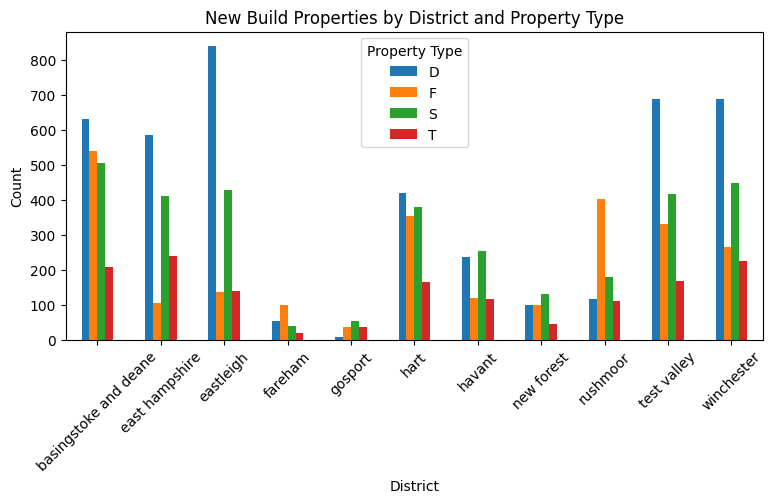

In [ ]:
# Displaying the counts of the column labelled "New Build? (Y/N)" where the values are "Y" grouped by the values in the columns labelled "District" and "Property Type"

# Grouping the data by 'District' and 'Property Type' and counting the occurrences of 'Y' in 'New Build? (Y/N)'
new_build_by_District_property_type = df_cleaned_housing_data[
    df_cleaned_housing_data['New Build? (Y/N)'] == 'Y'
].groupby(['District', 'Property Type'])['New Build? (Y/N)'].count().unstack()

print(new_build_by_District_property_type)

# Plotting a bar chart displaying the counts of values "Y" in the column labelled "New Build? (Y/N)" grouped by the values in the columns labelled "District" and "Property Type"
new_build_by_District_property_type.plot(kind='bar', figsize=(9, 4))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('New Build Properties by District and Property Type')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


<ipython-input-58-d9d4bea45d65>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['District', 'Duration'])['New Build? (Y/N)'].count().unstack()


Duration                  F    L
District                        
basingstoke and deane  1351  531
east hampshire         1239   97
eastleigh              1406  133
fareham                 111  100
gosport                  96   37
hart                    950  364
havant                  608  115
new forest              278   98
rushmoor                409  394
test valley            1270  329
winchester             1368  257


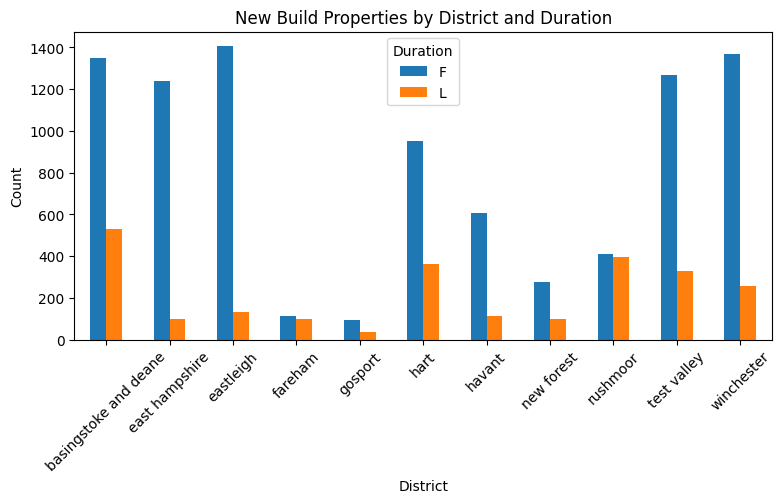

In [ ]:
# Displaying the counts of the column labelled "New Build? (Y/N)" where the values are "Y" grouped by the values in the columns labelled "District" and "Duration"

# Grouping the data by 'District' and 'Duration' and counting the occurrences of 'Y' in 'New Build? (Y/N)'
new_build_by_District_duration = df_cleaned_housing_data[
    df_cleaned_housing_data['New Build? (Y/N)'] == 'Y'
].groupby(['District', 'Duration'])['New Build? (Y/N)'].count().unstack()

print(new_build_by_District_duration)

# Plotting a bar chart displaying the counts of values "Y" in the column labelled "New Build? (Y/N)" grouped by the values in the columns labelled "District" and "Duration"
new_build_by_District_duration.plot(kind='bar', figsize=(9, 4))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('New Build Properties by District and Duration')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.show()


<ipython-input-59-545d79748c7e>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_build_prices = new_build_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()


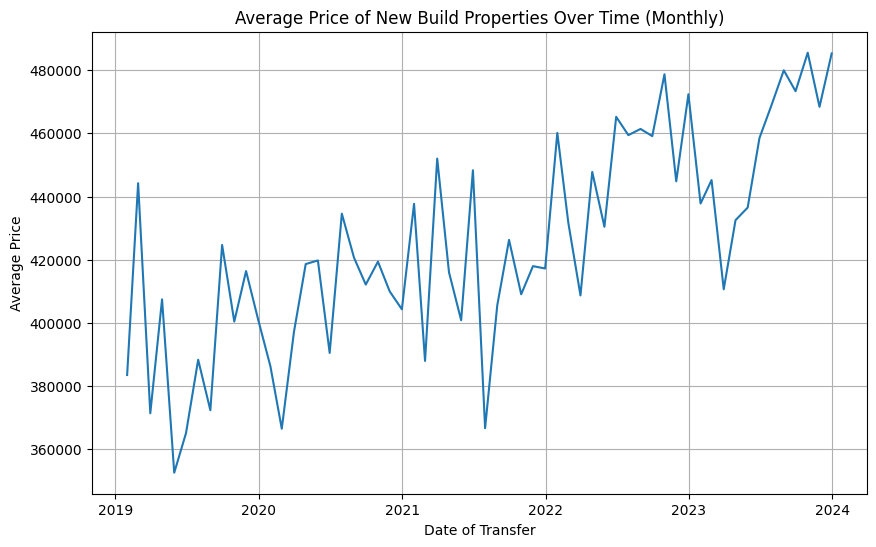

In [ ]:
# Plotting the price of New Build properties over Date of Transfer in monthly intervals

# Converting 'Date of Transfer' to datetime objects
df_cleaned_housing_data['Date of Transfer'] = pd.to_datetime(df_cleaned_housing_data['Date of Transfer'])

# Filtering for New Build properties
new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'Y']

# Grouping by month and calculate the mean price
monthly_new_build_prices = new_build_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()

# Plotting the price trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_new_build_prices.index, monthly_new_build_prices.values)
plt.xlabel('Date of Transfer')
plt.ylabel('Average Price')
plt.title('Average Price of New Build Properties Over Time (Monthly)')
plt.grid(True)
plt.show()


<ipython-input-60-588c5dd11eb5>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_non_new_build_prices = non_new_build_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()


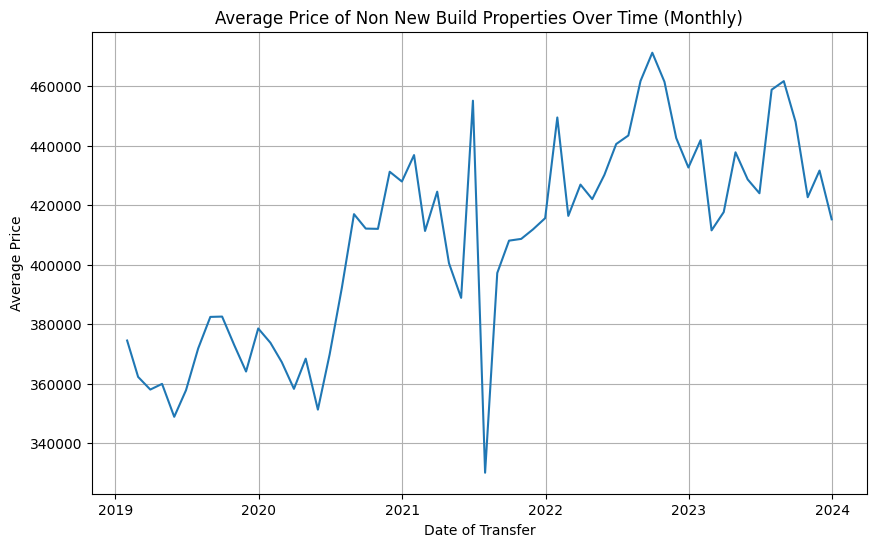

In [ ]:
# Plotting the price of Non New Build properties over Date of Transfer in monthly intervals

# Converting 'Date of Transfer' to datetime objects
df_cleaned_housing_data['Date of Transfer'] = pd.to_datetime(df_cleaned_housing_data['Date of Transfer'])

# Filtering for Non New Build properties
non_new_build_properties = df_cleaned_housing_data[df_cleaned_housing_data['New Build? (Y/N)'] == 'N']

# Grouping by month and calculate the mean price
monthly_non_new_build_prices = non_new_build_properties.groupby(pd.Grouper(key='Date of Transfer', freq='M'))['Price'].mean()

# Plotting the price trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_non_new_build_prices.index, monthly_non_new_build_prices.values)
plt.xlabel('Date of Transfer')
plt.ylabel('Average Price')
plt.title('Average Price of Non New Build Properties Over Time (Monthly)')
plt.grid(True)
plt.show()


**9. Summary of Insights**

*3. Univariate Analysis*

  _3.1. Price_

  - Findings:

    - The Skewness of Price is 4.87, indicating that the distribution of prices is highly skewed to the right. Hence, there are many lower-priced observations, but a few extreme, high-priced observations pulling the distribution to the right. This right skew suggests that there are some very high outliers in the dataset.

    - The Kurtosis of Price is 43.16, indicating that the distribution of prices has very heavy tails, meaning there are many outliers (particularly extreme values far from the mean). Hence, the price distribution has more extreme deviations than a normal distribution.

    - Overall Conclusion: The data shows that prices are highly skewed to the right, with a lot of outliers or extreme values. This might suggest that a small number of high-priced items are significantly affecting the distribution, making it non-normal.


  _3.2. Categorical Columns_

  - Findings: "Terraced" and "Semi-Detatched" make up the majority of the transactions, whilst "Flats" are the property type which have the least transactions.

  - Findings: The majority of the transactions are not New Build properties.

  - Findings: The majority of the transactions are "Freehold" properties.

  - Findings: The majority of the transactions are from the "Regular" Price Segment.

*4. Bivariate Analysis*


  _4.2. Price vs. Location_

  - Findings: The mean average price is generally greater in Greater London and in the South of England. The mean average price is generally lesser in the North of England and in Wales.

  _4.3. Price Over Time_

  - Findings: There is no noticeable trends in the change of the mean average property price over time.

*5. Multivariate Analysis*

  _5.2. Correlation Matrix_

  - Findings:
    - There is notable correlation between Price and; Detatched Properties, the Greater London Region.

    - There is notable correlation between Freehold Properties and; Detatched Properties, Semi-Detatched Properties and Terraced Properties.

    - There is notable correlation between Leasehold Properties and Flats.

    - There is notable correlation between London and; Leasehold Properties and Flats.

*6. Hypothesis Testing*

  _6.1. ANOVA: Price Differences by Property Type_

  - R-squared (0.081): The model explains 8.1% of the variability in Price. Hence, "Property Type" alone isn’t explaining much of the variation in prices.

  - F-statistic (133.8): The p-value for this F-stat is 4.54e-83, which is practically 0. Hence, the difference in price across the property types is statistically significant.

  - Coefficients:
  
    - Intercept (5.006e+05): This is the base price (around £500,600) when the property type is the reference category, "Detatched" properties.
    - Property Type [T.F] (-2.032e+05): Flats are, on average, about £203,200 cheaper than the base property.
    - Property Type [T.S] (-1.866e+05): Semi-Detatched properties are about £186,600 cheaper than the base property.

**10. Prepare for Modeling**

In [ ]:
# Displaying the data types of each column

print(df_cleaned_housing_data.dtypes)


Transaction Unique ID                               object
Price                                                int64
Date of Transfer                            datetime64[ns]
Post Code                                           object
Property Type                                     category
New Build? (Y/N)                                  category
Duration                                          category
Primary Addressable Object Name (PAON)              object
Secondary Addressable Object Name (SAON)            object
Town/City                                           object
District                                            object
Price_Segment                                       object
latitude                                            object
longitude                                           object
Post Code Area                                      object
TimeTrend                                            int64
dtype: object


In [ ]:
# Dropping the columns which are irrelevant for modelling:

df_cleaned_housing_data = df_cleaned_housing_data.drop(columns=['Date of Transfer', 'Transaction Unique ID', 'Post Code', 'Primary Addressable Object Name (PAON)', 'Secondary Addressable Object Name (SAON)', 'Town/City', 'latitude', 'longitude', 'Post Code Area'])

In [ ]:
# Displaying the data types of each column

print(df_cleaned_housing_data.dtypes)

Price                  int64
Property Type       category
New Build? (Y/N)    category
Duration            category
District              object
Price_Segment         object
TimeTrend              int64
dtype: object


In [ ]:
# Create dummy variables for categorical columns

df_cleaned_housing_data = pd.get_dummies(df_cleaned_housing_data,
                                         columns=['Property Type', 'New Build? (Y/N)', 'Duration', 'Price_Segment','District'],
                                         drop_first=True)


In [ ]:
# Displaying the data types of each column

print(df_cleaned_housing_data.dtypes)

Price                      int64
TimeTrend                  int64
Property Type_F             bool
Property Type_S             bool
Property Type_T             bool
New Build? (Y/N)_Y          bool
Duration_L                  bool
Price_Segment_Luxury        bool
Price_Segment_Regular       bool
District_east hampshire     bool
District_eastleigh          bool
District_fareham            bool
District_gosport            bool
District_hart               bool
District_havant             bool
District_new forest         bool
District_rushmoor           bool
District_test valley        bool
District_winchester         bool
dtype: object


**11. Exporting Dataset for Modelling**

In [ ]:
# Exporting the dataset as a .csv file

df_cleaned_housing_data.to_csv('/content/drive/MyDrive/Housing Prices Project/Hampshire 5 Year/model_housing_data_Hampshire_5_year.csv', index=False)


In [ ]:
# Exporting the dataset as a pickle file

df_cleaned_housing_data.to_pickle('/content/drive/MyDrive/Housing Prices Project/Hampshire 5 Year/model_housing_data_Hampshire_5_year.pkl')
